In [130]:
import numpy  as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.metrics import mean_squared_error


1. Data investigation
1.1 Plots

In [131]:
data = pd.read_csv('car_data.csv') # read the data from csv file that you have locally.
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


The std
row shows the standard deviation (which measures how dispersed the values are).
Low standard deviation means data are clustered around the mean, and high standard deviation indicates data are more spread out.

The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indi‐
cates the value below which a given percentage of observations in a group of observa‐
tions falls. 
For example, 25% of the districts have a housing_median_age lower than

In [5]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
data.isna().sum().sum()

0

In [14]:
fig = px.histogram(data, 
                   x='Year', 
                   marginal='box', 
                   nbins=16, 
                   title='Distribution of Year')
fig.update_layout(bargap=0.1)
fig.show()

In [15]:
fig = px.histogram(data, 
                   x='Selling_Price', 
                   marginal='box', 
                   color='Transmission', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

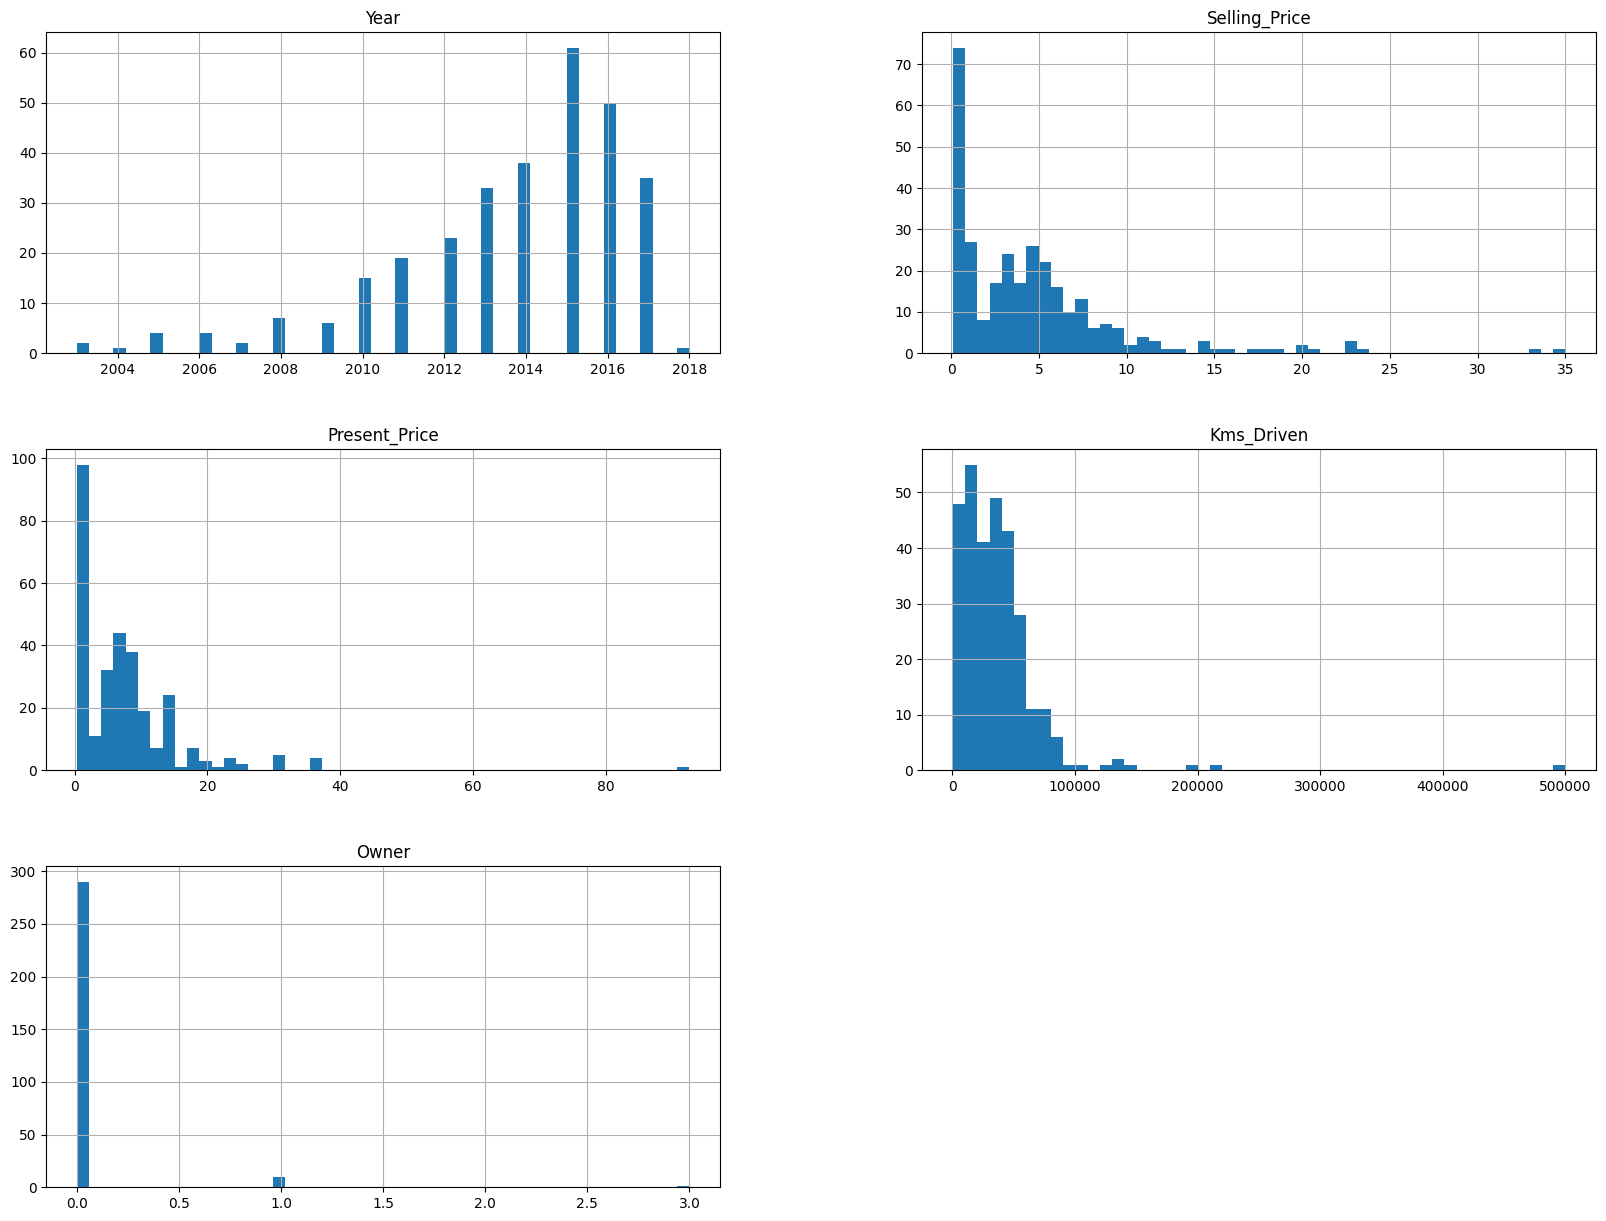

In [10]:
data.hist(bins = 50, figsize=(20,15))
plt.show()

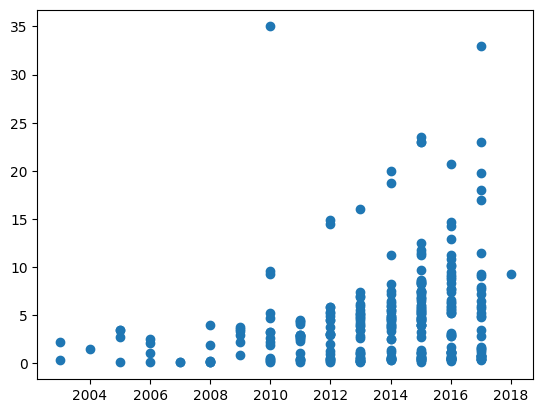

In [17]:
plt.scatter(data['Year'],data['Selling_Price'])
plt.show()

In [89]:
fig = px.scatter(data, 
                 x='Kms_Driven',
                 y='Selling_Price', 
                 opacity=0.8, 
                 title='Kilometers driven vs. Selling Price')
fig.update_traces(marker_size=5)
fig.show()

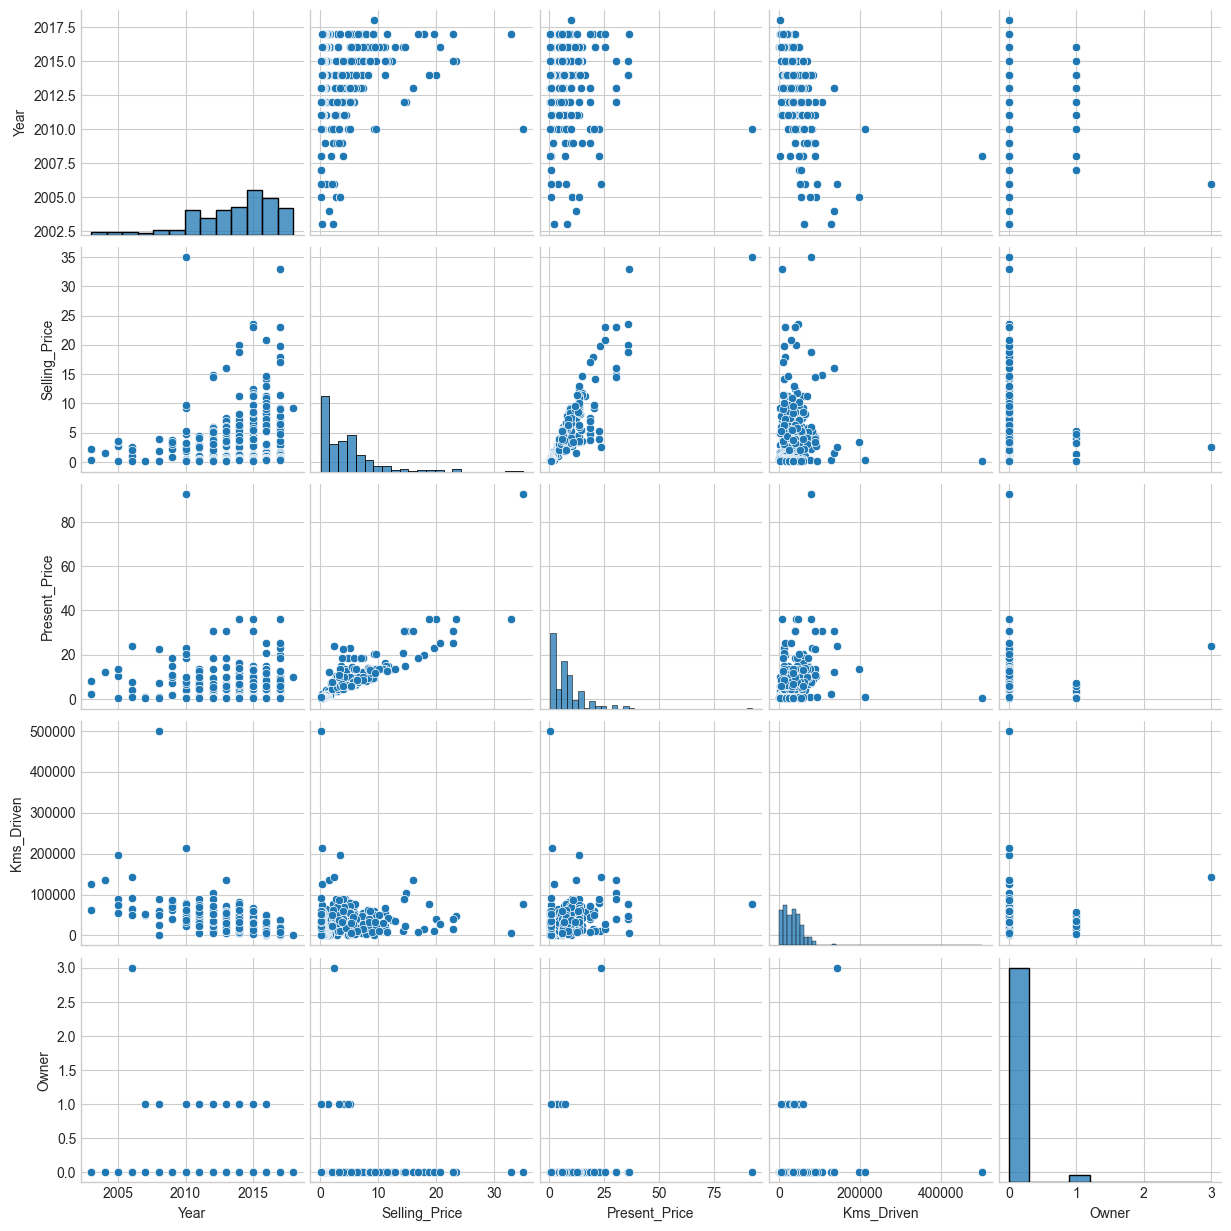

In [26]:

#style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (20,10)
sb.pairplot(data)
plt.savefig('pairplor.png')

1.2 Correlation 
When the value of ‘r’ is between 0 and +1/-1, it indicates that there is a relationship between the two variables, but it’s not perfectly linear — the data points don’t all fall on a straight line.

If ‘r’ is close to +1, it indicates a strong positive linear relationship. That means as one variable increases, the other variable also tends to increase, and the data points will cluster tightly around a rising straight line.

If ‘r’ is close to -1, it signifies a strong negative linear relationship. This means that as one variable increases, the other tends to decrease, with data points clustering tightly around a falling straight line.
An ‘r’ value near 0 indicates that there’s little or no linear relationship between the two variables

C:\Users\jalpa\AppData\Local\Temp\ipykernel_37976\3072434586.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'Correlation Matrix')

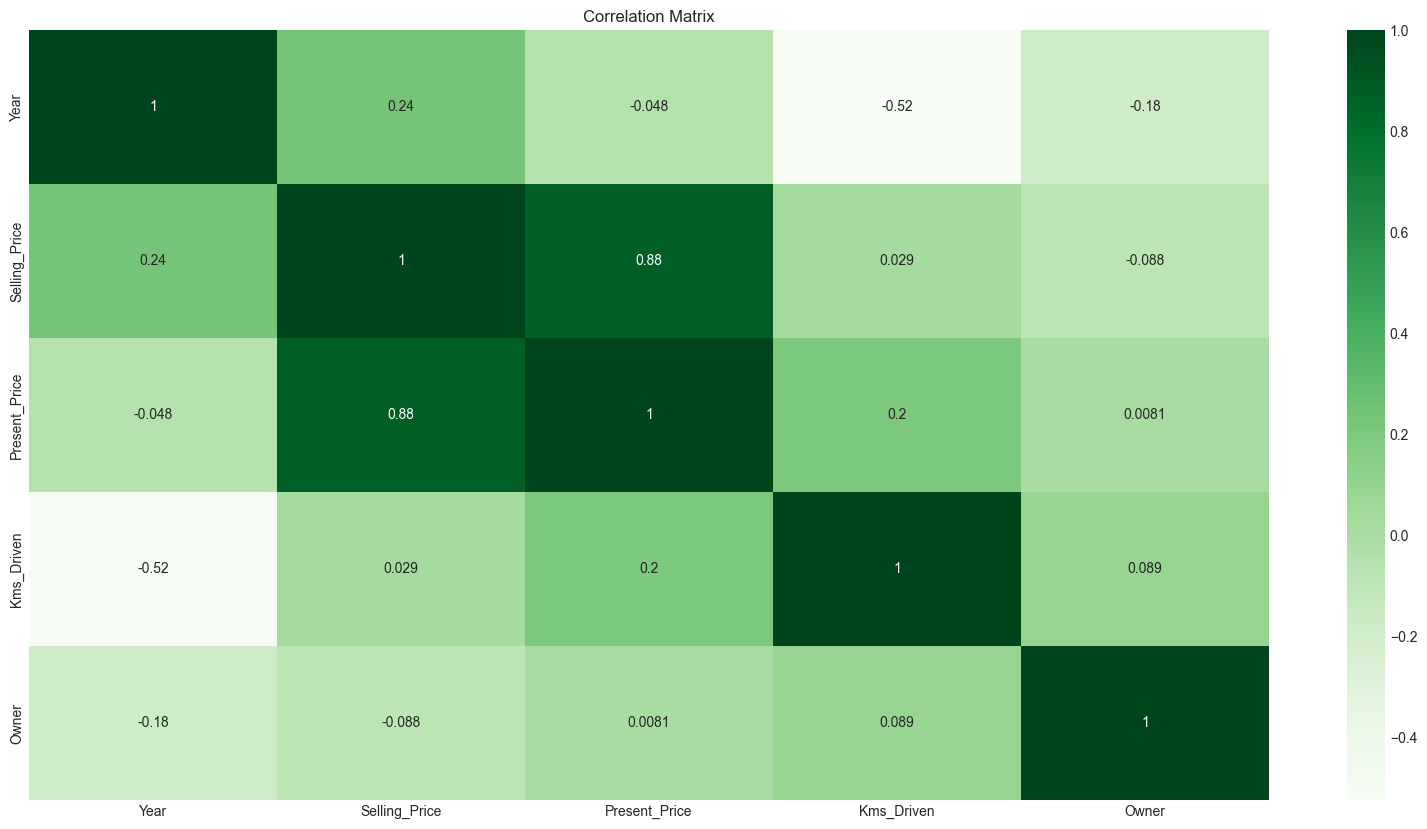

In [30]:
sb.heatmap(data.corr(), cmap='Greens', annot=True)
plt.title('Correlation Matrix')

In [114]:
# X_var = data[['Kms_Driven'] ].apply(lambda x: x/10000)# independent variable
X_var = data[['Kms_Driven'] ]# independent variable

y_var = data['Selling_Price']

In [111]:
y_var

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [115]:
X_var

,Kms_Driven
0,2.7000
1,4.3000
2,0.6900
3,0.5200
4,4.2450
...,...
296,3.3988
297,6.0000
298,8.7934
299,0.9000


In [116]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.1, random_state = 1)
object= StandardScaler()

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [117]:
error = mean_squared_error(y_test,y_pred)
error

8.445947267097825

In [99]:
y_pred.shape

(31,)

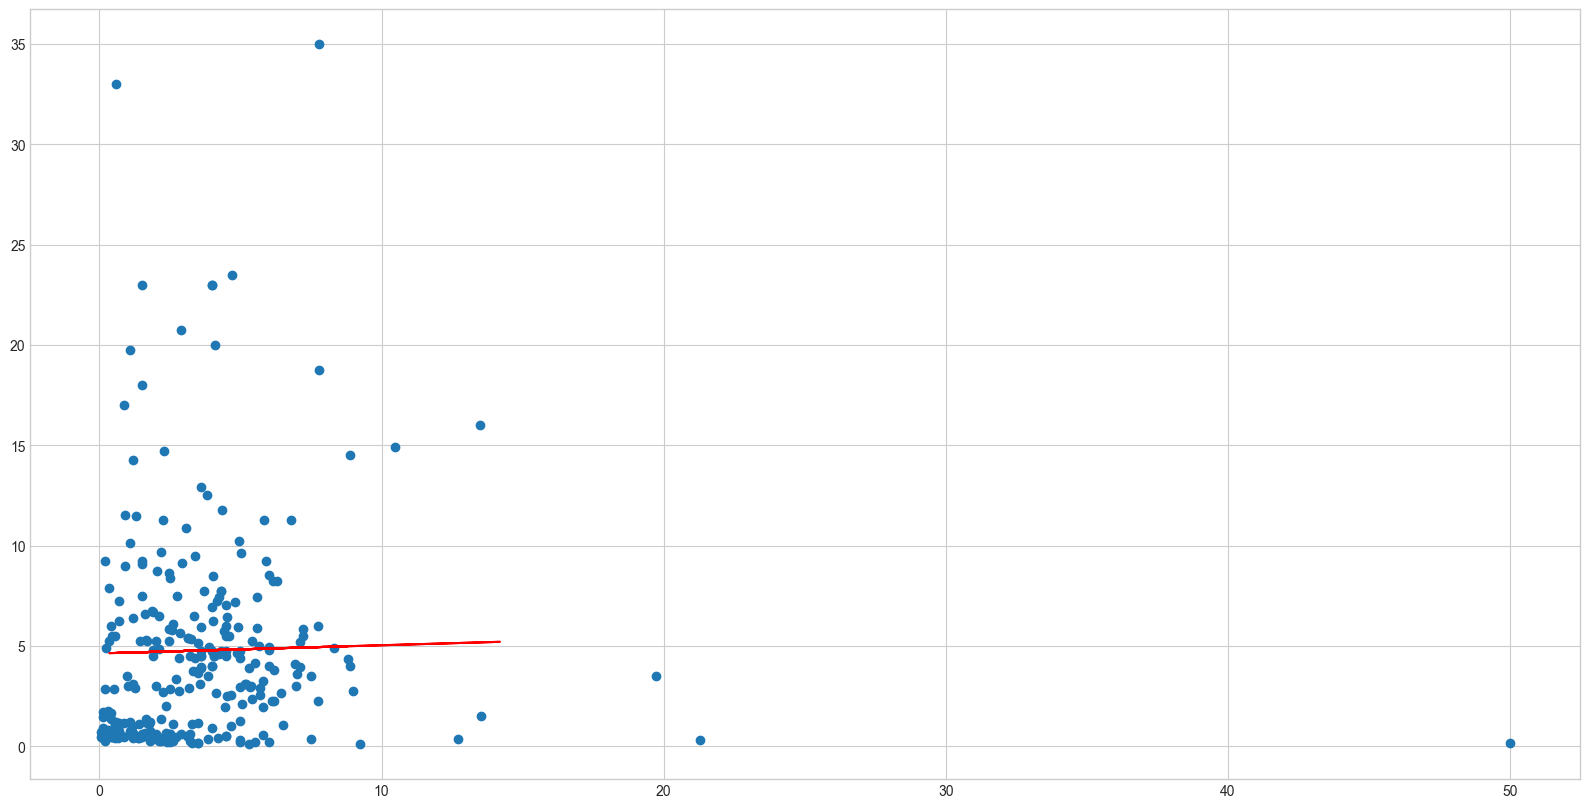

In [118]:
plt.scatter(X_train,y_train)
plt.plot(X_test, y_pred, color ='red')

plt.show()

2. Multi Label Regression

In [143]:
X_var = data[['Present_Price', 'Year','Kms_Driven']]
y_var = data.Selling_Price


X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.1, random_state = 1)
object= StandardScaler()

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [144]:
error = mean_squared_error(y_test,y_pred)
error

3.643275838237022

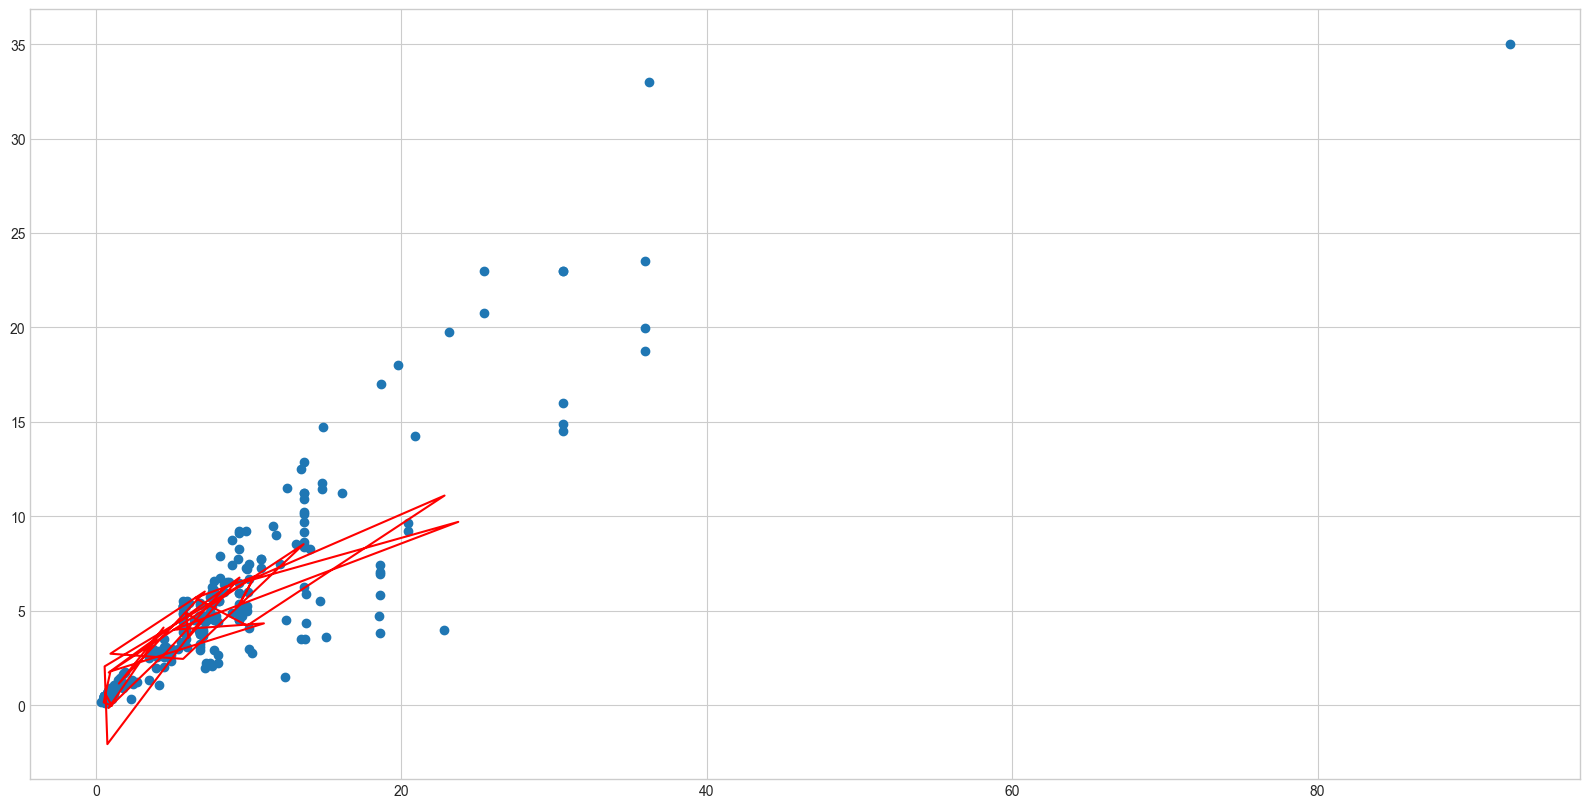

In [145]:
plt.scatter(X_train['Present_Price'],y_train)
plt.plot(X_test['Present_Price'], y_pred, color ='red')

plt.show()

categorical

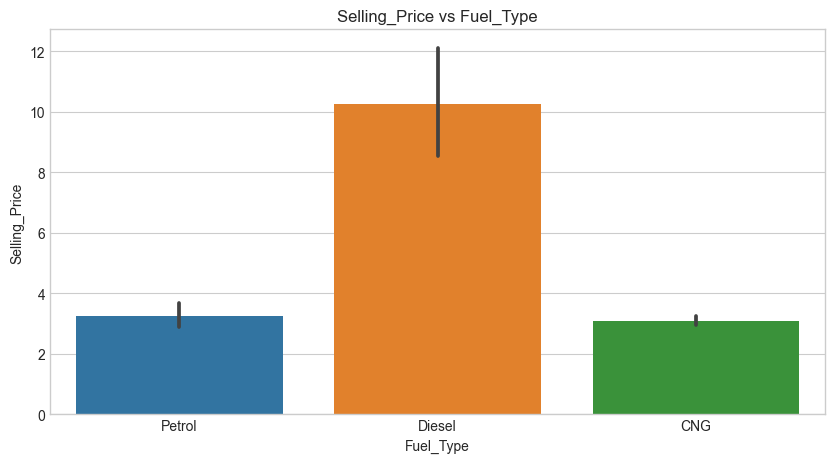

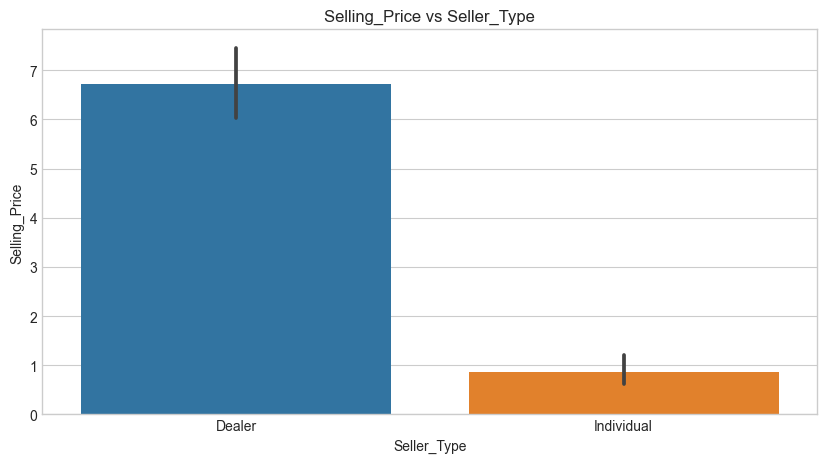

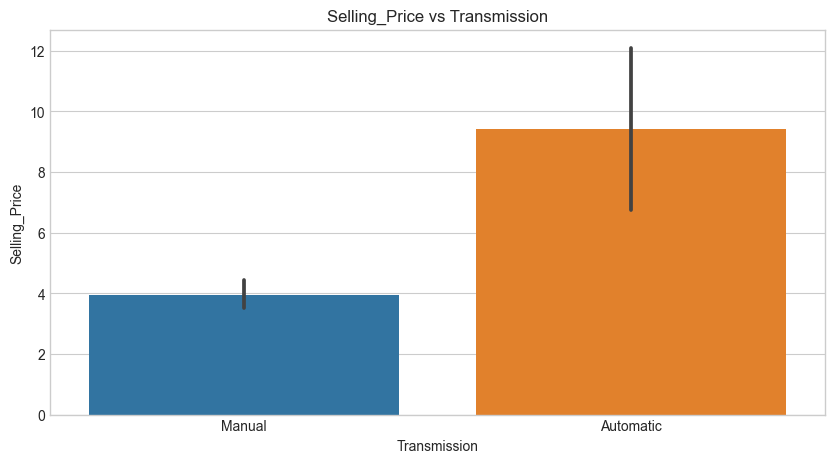

In [146]:
categorical_columns = ['Fuel_Type', 'Seller_Type', 'Transmission']

for column in categorical_columns:
    plt.figure(figsize=(10,5))
    sb.barplot(data = data, x = column,y = "Selling_Price")
    plt.title(f'Selling_Price vs {column}')
    plt.show()

In [149]:
data = pd.get_dummies(data, columns=['Fuel_Type','Seller_Type','Transmission'], drop_first=True)
data.head()


KeyError: "None of [Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')] are in the [columns]"